In [1]:
import os, importlib, sys, time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt

In [4]:
import freqepid

# 1. parameters

In [5]:
T = 60
T0 = 40

In [6]:
GPi = np.load('data/GPi.npz')

## observation parameters

In [7]:
alpha = 0.01
r_Y = 10

$$Y_t = NegBinom( \frac{EY_t}{r_Y + EY_t}, r_Y )$$

$$ EY_t = \alpha\sum_{s=1}^{t-1} I_s \pi_{t-s} $$

## latent parameters

In [8]:
d = 2
beta = np.array([1, -3.2])

In [9]:
r_I = 100
K = 6.5

$$I_t = NegBinom( \frac{EI_t}{r_I + EI_t}, r_I )$$

$$ EI_t = R(\bar{A}_t, \beta) \sum_{s=1}^{t-1} I_s g_{t-s} $$

$$R(\bar{A}_t, \beta) = \frac{K}{1+\exp(- \beta^\top A_t)}$$

## seed values

In [10]:
mu = np.log(100)

$$I_{[-T_0,0)} = \exp(\mu_0)$$

# 2. simulation

In [11]:
num_sim = 1000

## load simulation

In [12]:
data = pd.read_feather('data/simulation_randinf_4.feather')

In [13]:
data

,sim,date,R,EI,infection,EY,death,intervention
0,0,0,4.751881,475.184804,516.0,0.956069,1,0
1,0,1,4.751881,511.412680,505.0,0.962545,1,0
2,0,2,4.751881,642.093954,669.0,0.968354,1,0
3,0,3,4.751881,854.356947,836.0,0.974111,3,0
4,0,4,4.751881,1148.169578,942.0,0.981589,1,0
...,...,...,...,...,...,...,...,...
59995,999,55,0.648378,885.944342,908.0,39.632942,42,1
59996,999,56,0.648378,839.945956,853.0,37.595696,50,1
59997,999,57,0.648378,796.884901,795.0,35.639456,74,1
59998,999,58,0.648378,755.284834,661.0,33.743259,28,1


# 3. Fit

In [14]:
model = freqepid.Model(GPi['g'], GPi['pi'], alpha, K, T0, "nbinom")

In [15]:
nsim = np.zeros(num_sim)
msim = np.zeros(num_sim)
bsim = np.zeros((num_sim,d))

In [16]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    data_i = data[data['sim']==iter_sim]
    A = np.stack([np.full(T, 1), data_i["intervention"].to_numpy()], -1)
    Y = data_i["death"].to_numpy()
    
    # fit
    nmle, mmle, bmle, ll =\
    model.fit(A, Y, n_iter=500, step_size=1,
              history=False, verbose=False)
    
    nsim[iter_sim] = nmle
    msim[iter_sim] = mmle
    bsim[iter_sim,:] = bmle
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

/Users/blueconet/mambaforge/envs/freqepid/lib/python3.10/site-packages/freqepid/model.py:140: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  bhaty = np.linalg.lstsq(Xy, Yy)[0]


1-th simulation finished, 2.635063 sec.
2-th simulation finished, 2.544532 sec.
3-th simulation finished, 2.488963 sec.
4-th simulation finished, 2.511071 sec.
5-th simulation finished, 2.719303 sec.
6-th simulation finished, 2.621358 sec.
7-th simulation finished, 2.795858 sec.
8-th simulation finished, 2.596144 sec.
9-th simulation finished, 2.722276 sec.
10-th simulation finished, 2.726746 sec.
11-th simulation finished, 2.781624 sec.
12-th simulation finished, 2.629631 sec.
13-th simulation finished, 2.552818 sec.
14-th simulation finished, 2.504875 sec.
15-th simulation finished, 2.598064 sec.
16-th simulation finished, 2.394729 sec.
17-th simulation finished, 2.675034 sec.
18-th simulation finished, 2.635192 sec.
19-th simulation finished, 2.713565 sec.
20-th simulation finished, 2.627215 sec.
21-th simulation finished, 2.687697 sec.
22-th simulation finished, 2.614920 sec.
23-th simulation finished, 2.652219 sec.
24-th simulation finished, 2.575254 sec.
25-th simulation finished

199-th simulation finished, 2.673085 sec.
200-th simulation finished, 2.828364 sec.
201-th simulation finished, 2.861772 sec.
202-th simulation finished, 2.569903 sec.
203-th simulation finished, 2.677229 sec.
204-th simulation finished, 2.873563 sec.
205-th simulation finished, 2.706693 sec.
206-th simulation finished, 2.621682 sec.
207-th simulation finished, 2.711928 sec.
208-th simulation finished, 2.889379 sec.
209-th simulation finished, 2.490657 sec.
210-th simulation finished, 2.654900 sec.
211-th simulation finished, 2.621214 sec.
212-th simulation finished, 2.774348 sec.
213-th simulation finished, 3.061330 sec.
214-th simulation finished, 2.630199 sec.
215-th simulation finished, 2.649902 sec.
216-th simulation finished, 2.644940 sec.
217-th simulation finished, 2.639433 sec.
218-th simulation finished, 2.612094 sec.
219-th simulation finished, 2.640344 sec.
220-th simulation finished, 2.700417 sec.
221-th simulation finished, 2.714036 sec.
222-th simulation finished, 2.6859

395-th simulation finished, 2.673663 sec.
396-th simulation finished, 2.707792 sec.
397-th simulation finished, 3.320108 sec.
398-th simulation finished, 2.870026 sec.
399-th simulation finished, 2.719855 sec.
400-th simulation finished, 2.915350 sec.
401-th simulation finished, 2.751055 sec.
402-th simulation finished, 2.834036 sec.
403-th simulation finished, 2.912996 sec.
404-th simulation finished, 2.776763 sec.
405-th simulation finished, 3.620729 sec.
406-th simulation finished, 2.890951 sec.
407-th simulation finished, 3.055569 sec.
408-th simulation finished, 3.216222 sec.
409-th simulation finished, 2.830849 sec.
410-th simulation finished, 2.841306 sec.
411-th simulation finished, 2.835017 sec.
412-th simulation finished, 2.819706 sec.
413-th simulation finished, 2.779743 sec.
414-th simulation finished, 2.575919 sec.
415-th simulation finished, 2.769358 sec.
416-th simulation finished, 2.806291 sec.
417-th simulation finished, 3.014523 sec.
418-th simulation finished, 2.7652

591-th simulation finished, 2.710801 sec.
592-th simulation finished, 3.083180 sec.
593-th simulation finished, 2.855967 sec.
594-th simulation finished, 2.822954 sec.
595-th simulation finished, 2.858805 sec.
596-th simulation finished, 2.821933 sec.
597-th simulation finished, 2.843186 sec.
598-th simulation finished, 2.843595 sec.
599-th simulation finished, 2.686968 sec.
600-th simulation finished, 2.792967 sec.
601-th simulation finished, 2.793642 sec.
602-th simulation finished, 3.183530 sec.
603-th simulation finished, 3.159724 sec.
604-th simulation finished, 2.868038 sec.
605-th simulation finished, 2.839134 sec.
606-th simulation finished, 2.846972 sec.
607-th simulation finished, 2.889082 sec.
608-th simulation finished, 2.824480 sec.
609-th simulation finished, 3.049194 sec.
610-th simulation finished, 2.947150 sec.
611-th simulation finished, 2.808269 sec.
612-th simulation finished, 2.817915 sec.
613-th simulation finished, 2.759515 sec.
614-th simulation finished, 2.8154

787-th simulation finished, 2.817237 sec.
788-th simulation finished, 2.874824 sec.
789-th simulation finished, 2.878592 sec.
790-th simulation finished, 2.877018 sec.
791-th simulation finished, 2.913705 sec.
792-th simulation finished, 3.153260 sec.
793-th simulation finished, 3.236040 sec.
794-th simulation finished, 2.855110 sec.
795-th simulation finished, 2.881441 sec.
796-th simulation finished, 2.923213 sec.
797-th simulation finished, 2.775054 sec.
798-th simulation finished, 2.890112 sec.
799-th simulation finished, 3.026379 sec.
800-th simulation finished, 2.849170 sec.
801-th simulation finished, 2.825110 sec.
802-th simulation finished, 3.134195 sec.
803-th simulation finished, 2.807428 sec.
804-th simulation finished, 2.856062 sec.
805-th simulation finished, 2.837643 sec.
806-th simulation finished, 2.898462 sec.
807-th simulation finished, 2.846686 sec.
808-th simulation finished, 2.812694 sec.
809-th simulation finished, 2.852867 sec.
810-th simulation finished, 3.0237

983-th simulation finished, 2.925489 sec.
984-th simulation finished, 2.916147 sec.
985-th simulation finished, 2.930723 sec.
986-th simulation finished, 2.723893 sec.
987-th simulation finished, 2.897486 sec.
988-th simulation finished, 2.893320 sec.
989-th simulation finished, 3.064416 sec.
990-th simulation finished, 2.840154 sec.
991-th simulation finished, 2.859116 sec.
992-th simulation finished, 3.097173 sec.
993-th simulation finished, 2.952032 sec.
994-th simulation finished, 3.170086 sec.
995-th simulation finished, 3.151542 sec.
996-th simulation finished, 2.940692 sec.
997-th simulation finished, 2.839023 sec.
998-th simulation finished, 2.867546 sec.
999-th simulation finished, 3.256189 sec.
1000-th simulation finished, 2.854866 sec.


In [17]:
np.savez('coverage_freqepid_nbinom_randinf_4.npz',
         nsim = nsim, msim = msim, bsim = bsim)

# 4. Wald's Confidence Region Coverage Test

In [18]:
# locals.update(np.load('coverage_freqepid_nbinom_randinf_1.npz'))

In [19]:
Ihs_dth = np.zeros([num_sim, 2+d, 2+d])
Ts_dth = np.zeros(num_sim)
ps_dth = np.zeros(num_sim)

In [20]:
Ihs_hac = np.zeros([num_sim, 2+d, 2+d])
Ts_hac = np.zeros(num_sim)
ps_hac = np.zeros(num_sim)

In [21]:
Ihs_sdw = np.zeros([num_sim, 2+d, 2+d])
Ts_sdw = np.zeros(num_sim)
ps_sdw = np.zeros(num_sim)

In [22]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    nmle = nsim[iter_sim]
    mmle = msim[iter_sim]
    bmle = bsim[iter_sim,:]
    
    data_i = data[data['sim']==iter_sim]
    A = np.stack([np.full(T, 1), data_i["intervention"].to_numpy()], -1)
    Y = data_i["death"].to_numpy()
    
    Ihat_dth, Ihat_hac, Ihat_sdw =\
    model.inference(A, Y, nmle, mmle, bmle)
    
    # Fisher information matrix
    Ihs_dth[iter_sim] = Ihat_dth
    Ts_dth[iter_sim] = (bmle[1]-beta[1])/np.sqrt(la.pinv(Ihs_dth[iter_sim])[-1,-1])
    ps_dth[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_dth[iter_sim])))
    
    # HAC estimator
    Ihs_hac[iter_sim] = Ihat_hac
    Ts_hac[iter_sim] = (bmle[1]-beta[1])/np.sqrt(la.pinv(Ihs_hac[iter_sim])[-1,-1])
    ps_hac[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_hac[iter_sim])))
    
    # Sandwich estimator
    Ihs_sdw[iter_sim] = Ihat_sdw
    Ts_sdw[iter_sim] = (bmle[1]-beta[1])/np.sqrt(la.pinv(Ihs_sdw[iter_sim])[-1,-1])
    ps_sdw[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_sdw[iter_sim])))
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

1-th simulation finished, 0.002522 sec.
2-th simulation finished, 0.001588 sec.
3-th simulation finished, 0.001330 sec.
4-th simulation finished, 0.001245 sec.
5-th simulation finished, 0.001210 sec.
6-th simulation finished, 0.001196 sec.
7-th simulation finished, 0.001197 sec.
8-th simulation finished, 0.001219 sec.
9-th simulation finished, 0.001196 sec.
10-th simulation finished, 0.001188 sec.
11-th simulation finished, 0.001186 sec.
12-th simulation finished, 0.001189 sec.
13-th simulation finished, 0.001183 sec.
14-th simulation finished, 0.001189 sec.
15-th simulation finished, 0.001184 sec.
16-th simulation finished, 0.001189 sec.
17-th simulation finished, 0.001327 sec.
18-th simulation finished, 0.001430 sec.
19-th simulation finished, 0.001232 sec.
20-th simulation finished, 0.001194 sec.
21-th simulation finished, 0.001190 sec.
22-th simulation finished, 0.001232 sec.
23-th simulation finished, 0.001263 sec.
24-th simulation finished, 0.001200 sec.
25-th simulation finished

320-th simulation finished, 0.001158 sec.
321-th simulation finished, 0.001577 sec.
322-th simulation finished, 0.001219 sec.
323-th simulation finished, 0.001173 sec.
324-th simulation finished, 0.001189 sec.
325-th simulation finished, 0.001175 sec.
326-th simulation finished, 0.001190 sec.
327-th simulation finished, 0.001160 sec.
328-th simulation finished, 0.001181 sec.
329-th simulation finished, 0.001172 sec.
330-th simulation finished, 0.001186 sec.
331-th simulation finished, 0.001162 sec.
332-th simulation finished, 0.001233 sec.
333-th simulation finished, 0.001118 sec.
334-th simulation finished, 0.001201 sec.
335-th simulation finished, 0.001150 sec.
336-th simulation finished, 0.001133 sec.
337-th simulation finished, 0.001155 sec.
338-th simulation finished, 0.001126 sec.
339-th simulation finished, 0.001146 sec.
340-th simulation finished, 0.001152 sec.
341-th simulation finished, 0.001422 sec.
342-th simulation finished, 0.001408 sec.
343-th simulation finished, 0.0011

517-th simulation finished, 0.001600 sec.
518-th simulation finished, 0.001343 sec.
519-th simulation finished, 0.001169 sec.
520-th simulation finished, 0.001134 sec.
521-th simulation finished, 0.001152 sec.
522-th simulation finished, 0.001150 sec.
523-th simulation finished, 0.001124 sec.
524-th simulation finished, 0.001153 sec.
525-th simulation finished, 0.001174 sec.
526-th simulation finished, 0.001171 sec.
527-th simulation finished, 0.001159 sec.
528-th simulation finished, 0.001169 sec.
529-th simulation finished, 0.001172 sec.
530-th simulation finished, 0.001177 sec.
531-th simulation finished, 0.001159 sec.
532-th simulation finished, 0.001180 sec.
533-th simulation finished, 0.001154 sec.
534-th simulation finished, 0.001183 sec.
535-th simulation finished, 0.001151 sec.
536-th simulation finished, 0.001176 sec.
537-th simulation finished, 0.001177 sec.
538-th simulation finished, 0.001193 sec.
539-th simulation finished, 0.001181 sec.
540-th simulation finished, 0.0011

843-th simulation finished, 0.001282 sec.
844-th simulation finished, 0.001426 sec.
845-th simulation finished, 0.001167 sec.
846-th simulation finished, 0.001184 sec.
847-th simulation finished, 0.001158 sec.
848-th simulation finished, 0.001182 sec.
849-th simulation finished, 0.001146 sec.
850-th simulation finished, 0.001170 sec.
851-th simulation finished, 0.001132 sec.
852-th simulation finished, 0.001140 sec.
853-th simulation finished, 0.001120 sec.
854-th simulation finished, 0.001150 sec.
855-th simulation finished, 0.001118 sec.
856-th simulation finished, 0.001139 sec.
857-th simulation finished, 0.001111 sec.
858-th simulation finished, 0.001155 sec.
859-th simulation finished, 0.001113 sec.
860-th simulation finished, 0.001137 sec.
861-th simulation finished, 0.001113 sec.
862-th simulation finished, 0.001134 sec.
863-th simulation finished, 0.001152 sec.
864-th simulation finished, 0.001163 sec.
865-th simulation finished, 0.001149 sec.
866-th simulation finished, 0.0015

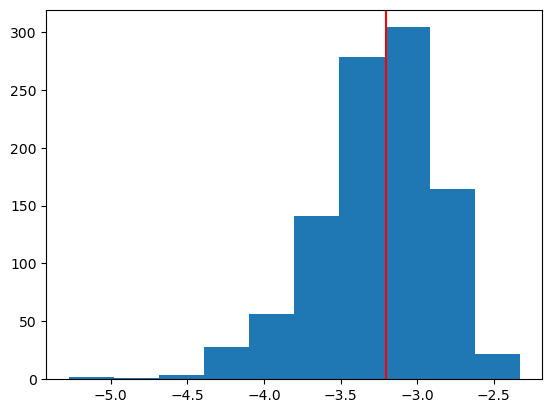

In [23]:
plt.hist(bsim[:,1])
plt.axvline(beta[1], color='red')

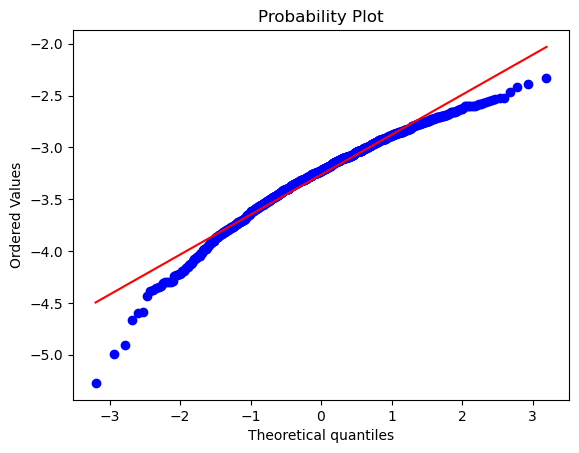

In [24]:
stats.probplot(bsim[:,1], dist = 'norm', plot=plt, fit=True)
# plt.plot([0, 1], [0, 1], color='black')
plt.show()

(array([ 78., 192., 221., 196., 124., 105.,  54.,  23.,   3.,   4.]),
 array([-1.82453662, -1.25023481, -0.67593299, -0.10163118,  0.47267063,
         1.04697244,  1.62127425,  2.19557606,  2.76987787,  3.34417969,
         3.9184815 ]),
 <BarContainer object of 10 artists>)

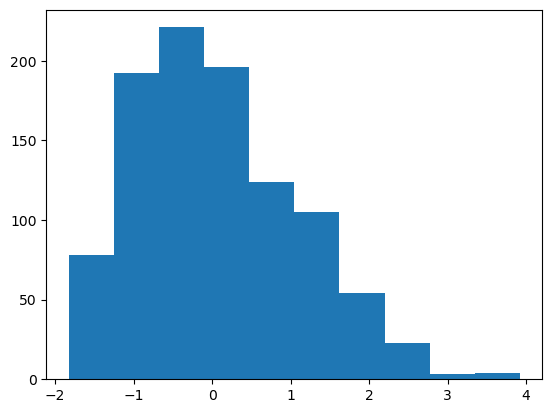

In [25]:
plt.hist(Ts_dth)

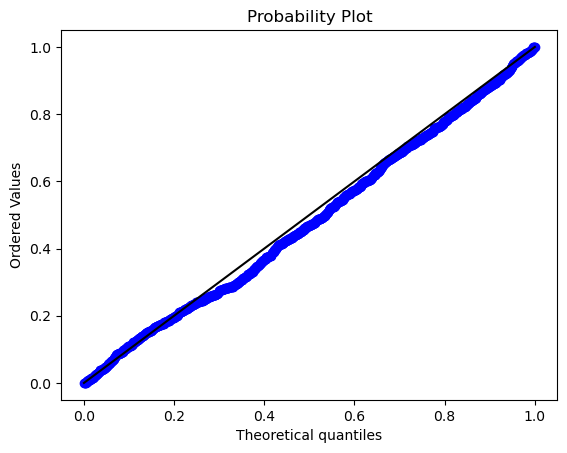

In [26]:
stats.probplot(ps_dth, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [27]:
np.mean(np.abs(ps_dth) > 0.05)

0.95

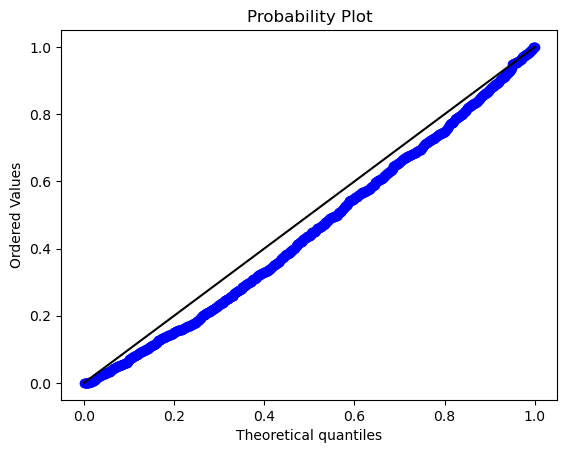

In [28]:
stats.probplot(ps_sdw, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [29]:
np.mean(np.abs(ps_sdw) > 0.05)

0.926